In [1]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\skche\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
#loading tagged sentences
sentences = list(brown.tagged_sents())

In [3]:
#example of tagged sentence
for i in sentences[5]:
    print(i)

('It', 'PPS')
('recommended', 'VBD')
('that', 'CS')
('Fulton', 'NP')
('legislators', 'NNS')
('act', 'VB')
('``', '``')
('to', 'TO')
('have', 'HV')
('these', 'DTS')
('laws', 'NNS')
('studied', 'VBN')
('and', 'CC')
('revised', 'VBN')
('to', 'IN')
('the', 'AT')
('end', 'NN')
('of', 'IN')
('modernizing', 'VBG')
('and', 'CC')
('improving', 'VBG')
('them', 'PPO')
("''", "''")
('.', '.')


In [4]:
#Adding STOP word and STOP tag to each sentence
for i in range(len(sentences)):
    sentences[i] =  sentences[i] + [('STOP','STOP')]

In [5]:
#function that takes tag until first occurance of + or - and leaves the tag untouched if they dont appear
def clean_tag(tag):
    out = tag.split('+')[0].split('-')[0]
    return out

In [6]:
#Cleaning tags
for i in range(len(sentences)):
    for j in range(len(sentences[i])):
        sentences[i][j] = sentences[i][j][0] , clean_tag( sentences[i][j][1])

In [7]:
#Creating a set of all POS (parts of speech)
S = set(['START'])
for sent in sentences:
    for pair in sent:
        S.add(pair[1])

In [8]:
print(len(S),S)

107 {'', 'HVZ', ',', 'DO', 'JJT', '``', 'NNS$', 'VBG', 'VBZ', 'STOP', 'OD', 'WRB', 'VB', 'HV', 'BEM*', 'BEN', 'PPLS', 'PN', "'", 'JJ', '.', 'WPO', 'CD$', 'NNS', 'BEDZ', '(', '*', 'JJ$', "''", 'BEM', 'DO*', 'BED*', 'RB$', 'BEDZ*', 'AT', 'DTS', 'CS', 'HVG', 'IN', 'ABX', 'MD', 'CD', 'START', 'RBR', 'RN', 'ABL', 'BED', ':', 'NN', 'NPS$', 'NRS', 'DTX', 'WDT', 'QLP', 'JJS', 'AP$', 'HVN', 'BEZ*', 'BER*', 'DT', 'PP$', 'AP', 'WQL', 'WPS', 'NP', 'NPS', 'VBD', 'NR', 'NN$', 'BEZ', 'WP$', 'DOD', 'BER', 'HVD', 'UH', 'PN$', 'PPL', 'HV*', 'MD*', 'EX', 'FW', 'TO', 'PPS', 'RB', 'QL', 'DT$', 'HVZ*', 'VBN', 'ABN', 'NP$', 'PPO', 'DOZ*', 'NIL', 'BE', 'DOD*', 'RP', 'PP$$', 'CC', 'JJR', 'DOZ', 'NR$', 'PPSS', ')', 'HVD*', 'DTI', 'BEG', 'RBT'}


In [9]:
#In the forum its written that we should separate between upper and lower case words,
#also that there is no need to tokenize or modify the sentences to fix non words or remove stopwords

In [10]:
#Splitting to train and test 
n = len(sentences)
train_size = int(n*0.9)
test_size = int(n*0.1)
train_set,test_set = sentences[:train_size],sentences[train_size:]

(b) Implementation of the most likely tag baseline

In [11]:
occurances = {}
for sent in train_set:
    for pair in sent:
        word,tag = pair
        if word not in occurances:
            occurances[word] = {}
        if tag not in occurances[word]:
            occurances[word][tag]=0
        occurances[word][tag] += 1

In [12]:
#Example of occurances entry
occurances['home']

{'NR': 238, 'NN': 221, 'VB': 1}

In [13]:
#Dictionary same as occurances but keeps only the most commmon tag and its probability
max_occurances = {}
for key,val in occurances.items():
    max_occurances[key] = (max(val, key=val.get),max(val.values())/sum(val.values()))

In [14]:
#Example of max_occurances entry
max_occurances['home']

('NR', 0.5173913043478261)

In [15]:
def most_likely_tag(word):
    if word in max_occurances:
        return max_occurances[word][0]
    return "NN"

In [16]:
#Here we calculate the accuracy of the predictions with the formula bellow
correct_test_words = 0
all_words = sum([len(i[:-1]) for i in test_set])  #subtract one because of the (STOP,STOP)

known_words_correct_tag = 0
known_words = sum([len([pair for pair in sent[:-1] if pair[0] in occurances]) for sent in test_set])

unknown_words_correct_tag = 0
unknown_words = all_words - known_words


for sent in test_set:
    for pair in sent[:-1]: #subtract one because of the (STOP,STOP)
        word,tag = pair
        predicted_tag = most_likely_tag(word)
        if predicted_tag == tag:
            correct_test_words += 1
        if word in occurances.keys() and predicted_tag == tag:
            known_words_correct_tag += 1
        else:
            if predicted_tag  == tag:
                unknown_words_correct_tag += 1
        
print("total error rate = " , 1 - (correct_test_words/all_words))
print("known words error rate = " , 1 - (known_words_correct_tag/known_words))
print("unknown words error rate = " , 1 - (unknown_words_correct_tag/unknown_words))

total error rate =  0.10327738312273427
known words error rate =  0.07783546586144718
unknown words error rate =  0.7970971563981043


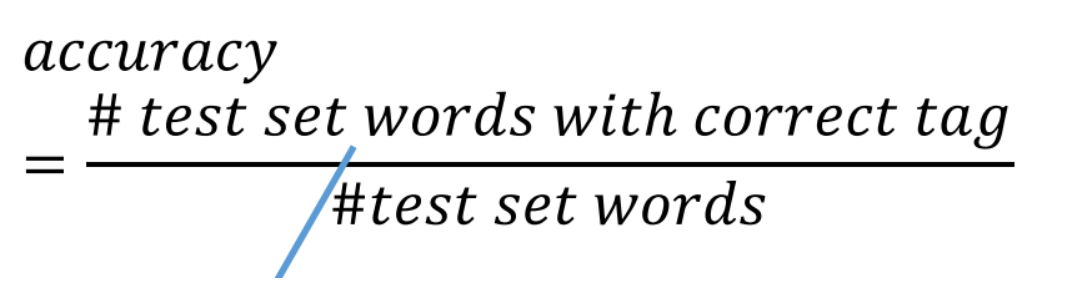

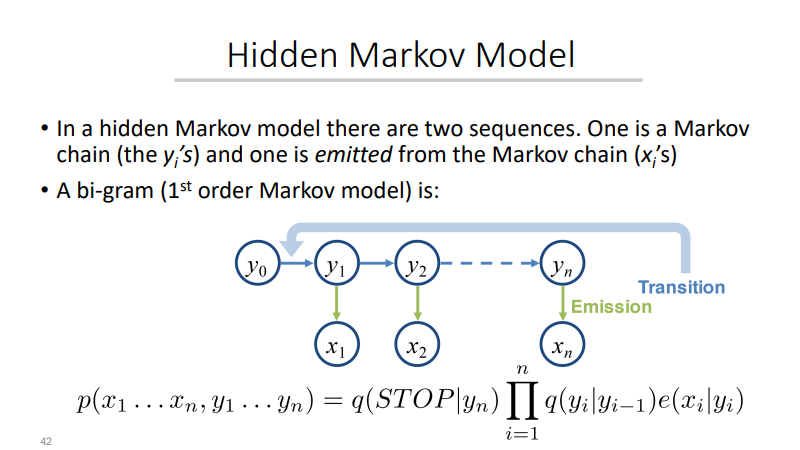

<!-- (c) Implementation of a bigram HMM tagger
i. Training phase: Compute the transition and emission probabilities of a bigram HMM tagger
directly on the training set using maximum likelihood estimation.
ii. Implement the Viterbi algorithm corresponding to the bigram HMM model. (Choose an
arbitrary tag for unknown words.)
iii. Run the algorithm from c)ii) on the test set. Compute the error rates and compare to the
results from b)ii). -->

<!-- (c) Implementation of a bigram HMM tagger
i. Training phase: Compute the transition and emission probabilities of a bigram HMM tagger
directly on the training set using maximum likelihood estimation.
ii. Implement the Viterbi algorithm corresponding to the bigram HMM model. (Choose an
arbitrary tag for unknown words.)
iii. Run the algorithm from c)ii) on the test set. Compute the error rates and compare to the
results from b)ii). -->

In [19]:
#Tag transition dictionary
#pos = part of speech
pos_transitions = {}
for sent_ in train_set:
    sent = [('START','START')] + sent_
    for i in range(len(sent)-1):
        tag1,tag2 = sent[i][1],sent[i+1][1]
        if tag1 not in pos_transitions:
            pos_transitions[tag1] = {}
        if tag2 not in pos_transitions[tag1]:
            pos_transitions[tag1][tag2] = 0
        pos_transitions[tag1][tag2] += 1

In [20]:
#sample entry of pos_transitions
pos_transitions['START']

{'AT': 8016,
 '``': 3082,
 'PPS': 5187,
 'NN': 2201,
 'WRB': 786,
 'RB': 3455,
 'NNS': 1093,
 'IN': 4577,
 'VB': 811,
 'CD': 931,
 '(': 342,
 'NP': 3568,
 'PP$': 907,
 'PPSS': 2858,
 'NP$': 255,
 'CS': 2074,
 'CC': 2483,
 '': 217,
 'AP': 466,
 'EX': 758,
 'VBG': 614,
 'DT': 1592,
 'JJ': 1286,
 'ABN': 181,
 'DTS': 405,
 'VBZ': 60,
 'VBN': 304,
 'VBD': 48,
 'ABX': 82,
 'MD*': 10,
 'QL': 259,
 ')': 166,
 'MD': 124,
 'DTI': 236,
 'PN': 235,
 'NR': 65,
 'RBR': 61,
 'WDT': 344,
 'TO': 236,
 'QLP': 1,
 "'": 19,
 '*': 132,
 'NN$': 32,
 ',': 11,
 '.': 60,
 'FW': 21,
 'UH': 109,
 'JJT': 15,
 'JJR': 41,
 'NR$': 5,
 'RP': 36,
 'DTX': 19,
 'JJS': 11,
 'NNS$': 13,
 'OD': 53,
 'BEZ': 61,
 "''": 75,
 'HVD': 28,
 'NPS': 30,
 'HVG': 18,
 'HVZ': 7,
 'WQL': 43,
 'ABL': 34,
 'DOZ': 27,
 'DO': 53,
 'BE': 22,
 'WPS': 53,
 'PP$$': 6,
 'BER*': 1,
 'DO*': 39,
 'BEG': 14,
 'BER': 37,
 'BEDZ': 24,
 'DOD': 15,
 'WPO': 3,
 'BEZ*': 5,
 'HV': 33,
 'WP$': 3,
 'BEDZ*': 5,
 'PN$': 3,
 'NIL': 3,
 'BED': 3,
 'BEM': 2,
 'D

In [21]:
#Dictionary with the most likely transition and its probability
max_pos_transitions = {}
for key,val in pos_transitions.items():
    max_pos_transitions[key] = (max(val, key=val.get),max(val.values())/sum(val.values()))

In [22]:
#Sample entry
max_pos_transitions['START']

('AT', 0.15533077549122196)

In [23]:
#Probability of seeing xi given yi
emmision_counts = {}
for sent in train_set:
    for i in range(len(sent)-1): #Subtract 1 because of (STOP,STOP)
        word,tag = sent[i]
        if tag not in emmision_counts:
            emmision_counts[tag] = {}
        if word not in emmision_counts[tag]:
            emmision_counts[tag][word] = 0
        emmision_counts[tag][word] += 1

In [24]:
#Sample entry of emmision_probability
emmision_counts['VB']

{'investigate': 10,
 'find': 349,
 'act': 73,
 'follow': 83,
 'inure': 2,
 'achieve': 51,
 'reduce': 62,
 'take': 504,
 'remedy': 3,
 'provide': 210,
 're-set': 1,
 'distribute': 6,
 'realize': 64,
 'disable': 1,
 'feel': 162,
 'receive': 74,
 'continue': 100,
 'place': 51,
 'serve': 99,
 'protect': 33,
 'eliminate': 25,
 'elaborate': 6,
 'Ask': 11,
 'work': 159,
 'pass': 60,
 'permit': 63,
 'run': 108,
 'enter': 75,
 'force': 22,
 'obtain': 42,
 'wait': 53,
 'make': 703,
 'face': 48,
 'sign': 18,
 'hold': 124,
 'become': 224,
 'wind': 7,
 'head': 13,
 'approve': 14,
 'determine': 90,
 'mention': 28,
 'issue': 14,
 'go': 512,
 'test': 16,
 'begin': 75,
 'offer': 64,
 'rescind': 2,
 'seek': 67,
 'set': 83,
 'allow': 69,
 'vote': 26,
 'ask': 104,
 'back': 21,
 'endorse': 6,
 'like': 178,
 'see': 639,
 'give': 345,
 'insure': 23,
 'smell': 9,
 'carry': 79,
 'recommend': 22,
 'produce': 72,
 'help': 184,
 'erase': 1,
 'report': 37,
 'locate': 14,
 'violate': 7,
 'undermine': 8,
 'destroy':

In [25]:
# q(tag1,tag2) = probability of transitioning to tag2 from tag1
def q(tag1,tag2):
    if tag1 in pos_transitions and tag2 in pos_transitions[tag1]:
        return pos_transitions[tag1][tag2] / sum([i for i in pos_transitions[tag1].values()])
    return 0
# e(tag,word) = probabiliy that given tag we emit word
def e(tag,word):
    if tag in emmision_counts and word in emmision_counts[tag]:
        return emmision_counts[tag][word] / sum(emmision_counts[tag].values())
    else:
        return 0

In [26]:
def bigramHMM(sent):
    p = 1
    for i in range(len(sent)-1):
        curr_word,curr_tag = sent[i]
        next_tag = sent[i+1][1]
        q_ = q(curr_tag,next_tag)
        e_ = e(curr_tag,curr_word)
        p *= q_*e_
    p *= q(sent[len(sent)-2][1],sent[len(sent)-1][1]) #q(STOP|last_y)
    return p

In [27]:
bigramHMM(test_set[5])

2.3991670408704208e-58

In [28]:
#Tag transition dictionary
#pos = part of speech
second_order_pos_transitions = {}
for sent_ in train_set:
    sent = [('START','START')] + [('START','START')] + sent_
    for i in range(len(sent)-2):
        tag1,tag2,tag3 = sent[i][1],sent[i+1][1],sent[i+2][1]
        if tag1 not in second_order_pos_transitions:
            second_order_pos_transitions[tag1] = {}
        if tag2 not in second_order_pos_transitions[tag1]:
            second_order_pos_transitions[tag1][tag2] = {}
        if tag3 not in second_order_pos_transitions[tag1][tag2]:
            second_order_pos_transitions[tag1][tag2][tag3] = 0
        second_order_pos_transitions[tag1][tag2][tag3] += 1

In [29]:
second_order_pos_transitions['NP']['HV']

{'VBN': 18,
 'HVN': 2,
 'BEN': 10,
 'QL': 2,
 'AT': 3,
 'AP': 3,
 'IN': 1,
 'PP$': 1,
 'RB': 3,
 'DTI': 1,
 'PPO': 1}

In [30]:
#returns probability of seeing tag3 given tag1->tag2
def second_order_q(tag1,tag2,tag3):
    if tag1 in second_order_pos_transitions and tag2 in second_order_pos_transitions[tag1] and tag3 in second_order_pos_transitions[tag1][tag2]:
        return second_order_pos_transitions[tag1][tag2][tag3] / sum([i for i in second_order_pos_transitions[tag1][tag2].values()])
    return 0

In [32]:
#saving dict with values to save computation time
second_order_pos_transitions_probs = {}
for tag1 in S:
    second_order_pos_transitions_probs[tag1] = {}
    for tag2 in S:
        second_order_pos_transitions_probs[tag1][tag2] = {}
        for tag3 in S:
            second_order_pos_transitions_probs[tag1][tag2][tag3] = second_order_q(tag1,tag2,tag3)

In [40]:
def return_PI_dict(n):
    PI = {}
    for i in range(-1,n+1):
        PI[i] = {}
        for u in S:
            PI[i][u] = {}
            for v in S:
                PI[i][u][v] = 0
    PI[0]['START']['START'] = 1
    return PI

In [33]:
#UNTIL HERE IS PROBABLY OK, FROM HERE ON ITS BAD AND MIGHT NEED REWRITING

In [107]:
#EMPTY DICT TO SAVE BACK POINTERS, PROBABLY A BAD IMPLEMENTATION
# def return_BPI_dict(n):
#     PI = {}
#     for i in range(-1,n+1):
#         PI[i] = {}
#         for u in S:
#             PI[i][u] = {}
#             for v in S:
#                 PI[i][u][v] = "NN"
#     return PI

In [41]:
# def return_S_dict(n):
#     S_0 = set(['START'])
#     S_dict = {-1: S_0, 0 : S_0}
#     for i in range(1,n+1):
#         S_dict[i] = S
#     return S_dict

In [135]:
# #UNSUCCESFUL IMPLEMENTATION OF VITEBRI

# def Vitebri(sent_):
#     #t0 = time.time()
#     n = len(sent_)
#     PI = return_PI_dict(n)
#     BPI = return_BPI_dict(n)
#     #t1 = time.time()
#     S_dict = return_S_dict(n)
#     #t2 = time.time()
#     for k in range(1,n+1):
#         for u in S_dict[k-1]:
#             for v in S_dict[k]:
#                 e_ = e(v,sent_[k-1][0])
#                 max_arg = "NN"
#                 if e_!= 0:
#                     for w in S_dict[k-2]:
#                         curr_val = PI[k-1][w][u]*second_order_pos_transitions_probs[w][u][v]*e_
#                         if curr_val > PI[k][u][v]:
#                             PI[k][u][v] = curr_val
#                             BPI[k][u][v] = w
                            
#     y_out = ["NN" for i in range(n)]
#     max_val = -1
#     for u in S:
#         for v in S:
#             curr = PI[n][u][v]*second_order_pos_transitions_probs[u][v]['STOP']
#             if curr>max_val:
#                 y_out[n-1],y_out[n-2] = u,v
#                 max_val = curr
#     for k in range(n-2,0,-1):
#         y_out[k-1] = BPI[k+2][y_out[k]][y_out[k+1]]
#     return y_out